# Customer Lifetime Value
### Created By : Kevin Pratama
---

[Sumber data](https://drive.google.com/file/d/1pYhQb2WcbwLAaMF4FPIEJSM34O-1A4v8/view?usp=sharing) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation


## **1. Business Problem Understanding**
---

**1.1. Context**

Sebuah perusahaan yang bergerak di bidang auto insurance ingin meningkatkan profitnya.
Dari seluruh populasi customernya perusahaan ingin melakukan evalusi mengenai aspek apa saja yang dianggap dapat memberikan pengaruh dalam peningkatan profit perusahaan.

Parameter yang akan digunakan untuk evalusai customer adalah dengan menggunakan nilai customer lifetime value (CLV).
CLV adalah sebuah metrik untuk memperkirakan total nilai customer terhadap sebuah perusahaan dalam jangka waktu tertentu (mengikuti durasi hubungan bisnis keduanya). 
Secara sederhana, CLV adalah prediksi atas nilai total pendapatan yang bisa perusahaan dapatkan dari customernya. Semakin besar CLV maka semakin besar juga profit perusahaan

**1.2. Problem Statement**

Salah satu permasalahan perusahaan auto insurance ini adalah menentukan aspek apa saja yang dapat memberikan pengaruh dalam peningkatan profit perusahaan sehingga dapat memfokuskan strategi bisnisnya ke aspek-aspek yang dianggap berpengaruh nantinya. 
Perusahaan juga perlu mengetahui berapa biaya maksimal yang bisa dikeluarkan untuk mengakuisisi customer. Jangan sampai biaya akuisisi yang dikeluarkan melebihi batas sehingga mengurangi profit perusahaan secara signifikan.

**1.3. Goals**

Berdasarkan permasalahan tersebut, perusahaan auto insurance ini perlu memiliki tool yang dapat memprediksi CLV, sehingga dapat membantu untuk menentukan aspek apa saja yang berpengaruh dalam memberikan profit kepada perusahaan dan menentukan biaya maksimal untuk melakukan akuisisi customer.



**1.4. Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang dapat membedakan satu customer dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk menyediakan tool yang dapat memprediksi CLV dari setiap customer, sehingga akan berguna untuk melihat profit yang akan didapatkan perusahaan dari setiap customer.

**1.5. Metric Evaluation**

Evaluasi metrik yang akan digunakan yaitu:
- RMSE adalah nilai rataan akar kuadrat dari error 
- MAE adalah rataan nilai absolut dari error
- MAPE adalah rataan nilai persentase error yang dihasilkan oleh model regresi
- R-squared adalah nilai seberapa baik model dapat merepresentasikan varians keseluruhan data

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi sesuai dengan limitasi fitur yang digunakan. 

Semakin mendekati 1 nilai R-squared yang dihasilkan, berarti semakin fit pula modelnya terhadap data observasi.

## **2. Data Understanding**
---

### **2.1. Data Information**

- Dataset yang digunakan berisi informasi customer dan informasi polis asuransi kendaraan mereka dari sejak awal menggunakan produk asuransi perusahaan auto insurance ini.
- Setiap baris data merepresentasikan informasi terkait keterangan seorang customer dengan polis asuransi kendaraan miliknya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class             | Object    | Tipe kendaraan |
| Coverage                  | Object    | Jenis pertanggungan polis asuransi customer |
| Renew Offer Type          | Object    | Penawaran untuk pembaruan polis |
| EmploymentStatus          | Object    | Status pekerjaan cutomer |
| Marital Status            | Object    | Status pernikahan cutomer |
| Education                 | Object    | Tingkat pendidikan customer |
| Number of Policies        | Float     | Jumlah polis yang dimiliki customer |
| Monthly Premium Auto      | Float     | Premi customer perbulan (USD) |
| Total Claim Amount        | Float     | Jumlah claim customer (USD) |
| Income                    | Float     | Pendapatan cutomer (USD) |
| Customer Lifetime Value   | Float     | Customer Lifetime Value (Target) |

<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# Load dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


### **2.2. Exploratory Data Analysis**

**Distribution**

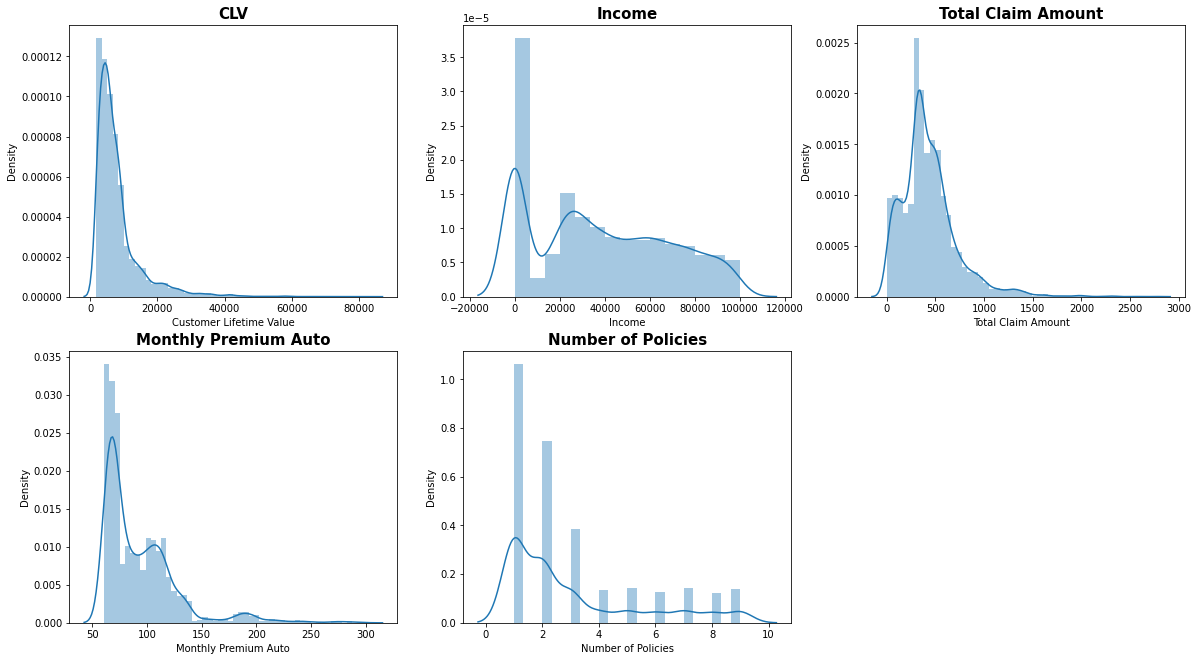

In [4]:
fig = plt.figure(figsize=(20,11))

#  subplot #1
plt.subplot(231)
plt.title('CLV', size=15, weight='bold')
sns.distplot(df['Customer Lifetime Value'])

#  subplot #2
plt.subplot(232)
plt.title('Income', size=15, weight='bold')
sns.distplot(df['Income'])

#  subplot #3
plt.subplot(233)
plt.title('Total Claim Amount', size=15, weight='bold')
sns.distplot(df['Total Claim Amount'])

#  subplot #4
plt.subplot(234)
plt.title('Monthly Premium Auto', size=15, weight='bold')
sns.distplot(df['Monthly Premium Auto'])

#  subplot #5
plt.subplot(235)
plt.title('Number of Policies', size=15, weight='bold')
sns.distplot(df['Number of Policies'])

plt.show()

Berdasarkan plot distribusi pada fitur-fitur yang ada di dataset, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada CLV, Income, Total Claim Amount, Monthly Premium Auto, Number of Policies.

**Descriptive statistic**

In [5]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Dari descriptive statistic diatas kita dapat melihat:
- Pada data numerik kita mendapat insight mengenai count, mean, std, dll
- Pada data kategorik kita mendapat insight mengenai karakteristik polis yang paling banyak dimiliki customer dan karakteristik customer itu sendiri.
karakteristik polis yang paling dominan adalah untuk kendaraan tipe Four-Door Car, coverage tipe Basic, dan Renew Offer tipe 1.
karakteristik customer yang paling dominan adalah yang sudah bekerja, menikah, dan tingkat pendidikan sarjana.

**Correlation**

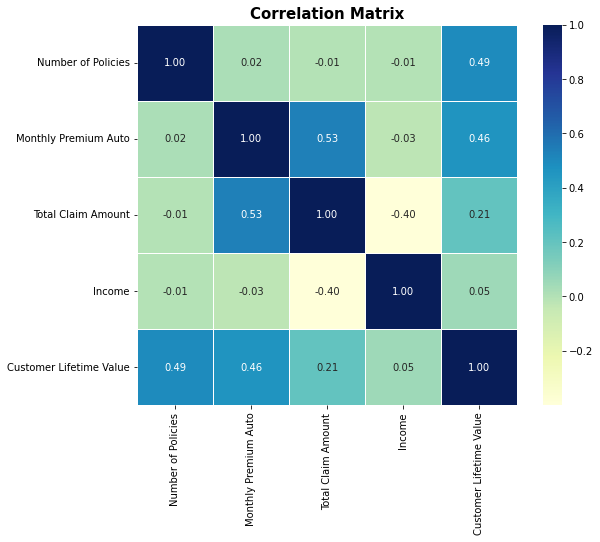

In [6]:
plt.figure(figsize=(9, 7))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap="YlGnBu", square=True, linewidths=1)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Korelasi yang digunakan dalam case ini adalah korelasi Spearman dikarenakan tidak memiliki syarat berdistribusi normal.

Dari correlation matrix diatas menunjukkan bahwa korelasi paling tinggi terhadap CLV dimiliki oleh fitur 'Monthly Premium Auto', dengan nilai 0.46 dan fitur 'Number of Policies' dengan nilai 0.49.

Berdasarkan [artikel ini](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8) nilai korelasi kedua fitur tersebut termasuk low positive correlation, yang berarti kedua fitur tersebut memiliki pengaruh terhadap CLV tetapi tidak kuat. 

## **3. Data Preprocessing**
---

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya akan kita gunakan untuk proses analisis selanjutnya. 
Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada.
- Melakukan treatment terhadap outlier jika ada.

### **3.1. Cek Feature, Unique Value, dan Missing Value**

In [7]:
# Membuat duplikat dataframe
df_model = df.copy()

In [8]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().values)])

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0,0.0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,0.0,5,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,object,0,0.0,3,"[Divorced, Married, Single]"
5,Education,object,0,0.0,5,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,float64,0,0.0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,float64,0,0.0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,float64,0,0.0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


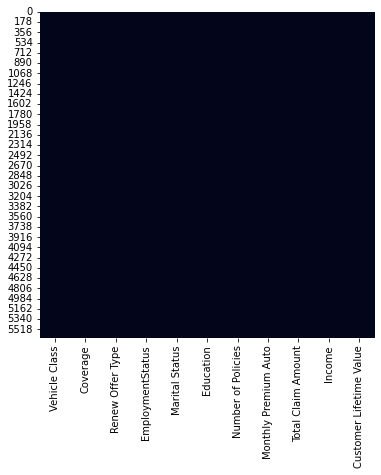

In [9]:
# cek missing value dengan heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Dari info dataset dan heatmap diatas dapat kita lihat bahwa:
- Jika ditinjau berdasarkan domain knowledge, semua fitur pada dataset memiliki relevansi dan kepentingan untuk analisis prediktif, oleh karena itu kita tidak perlu melakukan drop kolom manapun.
- Tidak terdapat anomali pada unique value kategorik dan numerik, semua unique value sudah memiliki arti yang jelas dan tidak menimbulkan keambiguan.
- Tiap baris data di dataset ini tidak memiliki unique id atau primary key, oleh karena itu tidak dapat dilakukan pengecekan duplicate data dan kita asumsikan di dataset ini tidak ada duplicate data.
- Tidak terdapat missing value pada dataset.

### **3.2. Handling Outlier**

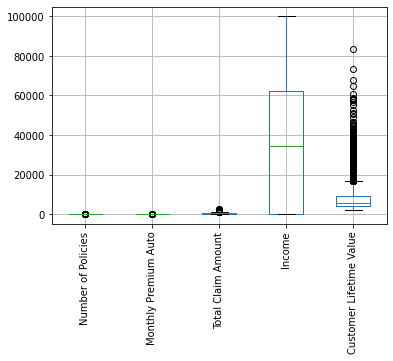

In [10]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90)
plt.show()

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'cleaned dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [11]:
# Fungsi untuk mengecek IQR dan limit
def limit(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')    

**Outlier Customer Lifetime Value**

In [12]:
limit(df_model['Customer Lifetime Value'])

IQR: 5076.870325
limit_bawah: -3660.9609535
limit_atas: 16646.5203465


In [13]:
df_model[df_model['Customer Lifetime Value'] > 16646.5203465].count()['Customer Lifetime Value']

499

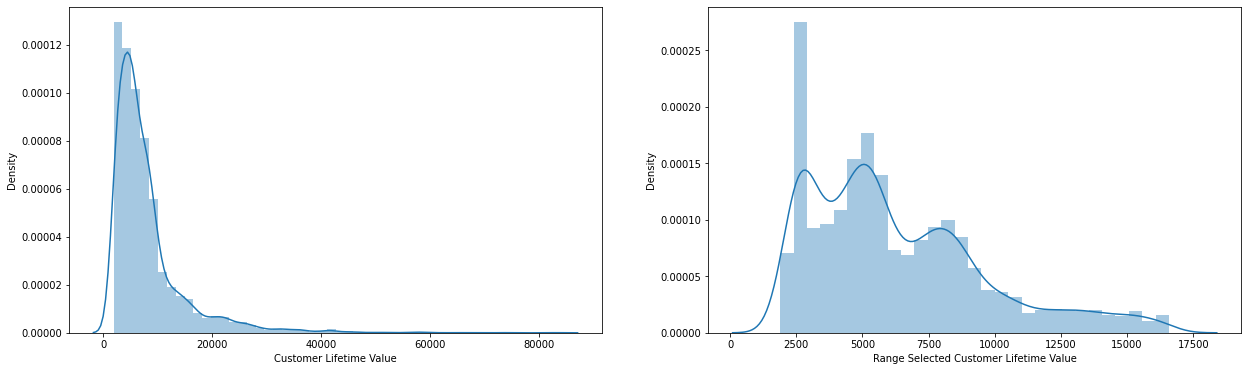

In [14]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Customer Lifetime Value'] <= 16646.5203465)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(df_model['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value')
plt.show()

**Outlier Total Claim Amount**

In [15]:
limit(df_model['Total Claim Amount'])

IQR: 276.25013025
limit_bawah: -148.22532562499998
limit_atas: 956.775195375


In [16]:
df_model[df_model['Total Claim Amount'] > 974.566507].count()['Total Claim Amount']

197

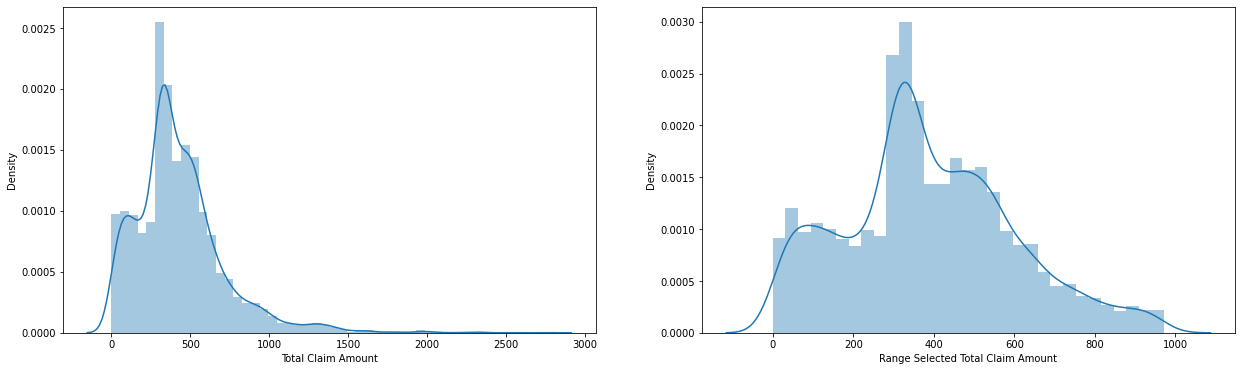

In [17]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Total Claim Amount'] <= 974.566507)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df_model['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount')
plt.show()

**Outlier Monthly Premium Auto**

In [18]:
limit(df_model['Monthly Premium Auto'])

IQR: 37.0
limit_bawah: 12.5
limit_atas: 160.5


In [19]:
df_model[df_model['Monthly Premium Auto'] > 163.0].count()['Monthly Premium Auto']

102

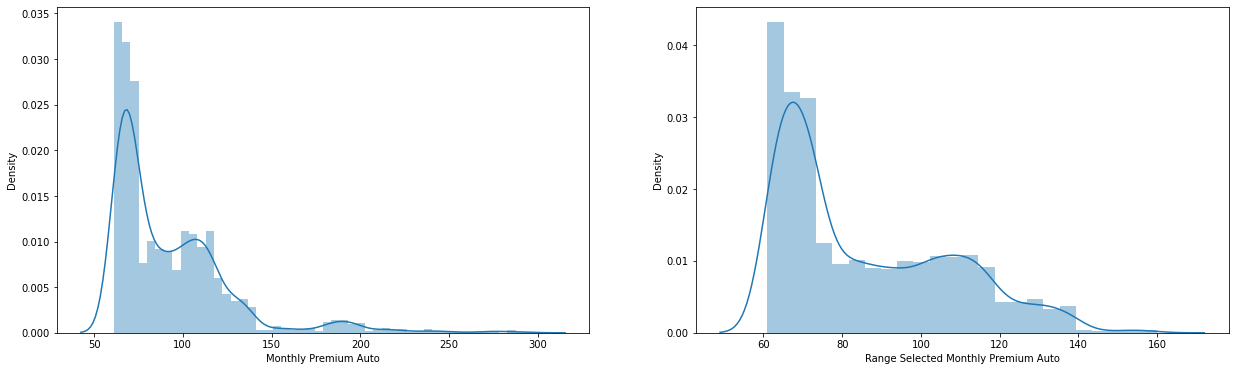

In [20]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Monthly Premium Auto'] <= 163.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0])
sns.distplot(df_model['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto')
plt.show()

**Outlier Income**

In [21]:
df[df["Income"]==0].head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297


Terdapat customer dengan income 0 dan setelah dicek ternyata mereka adalah customer dengan employment status unemployed, hal ini wajar sehingga data tersebut bukan merupakan outlier

### **3.3. Cleaned Dataset**

In [22]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4871 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4871 non-null   object 
 1   Coverage                 4871 non-null   object 
 2   Renew Offer Type         4871 non-null   object 
 3   EmploymentStatus         4871 non-null   object 
 4   Marital Status           4871 non-null   object 
 5   Education                4871 non-null   object 
 6   Number of Policies       4871 non-null   float64
 7   Monthly Premium Auto     4871 non-null   float64
 8   Total Claim Amount       4871 non-null   float64
 9   Income                   4871 non-null   float64
 10  Customer Lifetime Value  4871 non-null   float64
dtypes: float64(5), object(6)
memory usage: 456.7+ KB


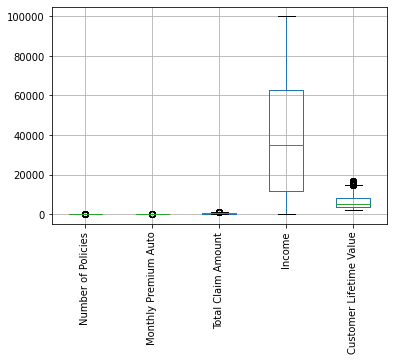

In [23]:
df_model.boxplot(rot=90)
plt.show()

Setelah proses cleaning tersisa 4871 baris data yang akan digunakan untuk pemodelan dari total baris data awal sebanyak 5669. Sekitar 14% data sudah tereliminasi sesuai dengan asumsi yang disampaikan di proses-proses sebelumnya.

## **4. Modeling**
---

In [24]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

### **4.1. Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [25]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']),
    ('Ordinal', ce.OrdinalEncoder(), ['Education'])
], remainder='passthrough')

Fitur 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status' menggunakan OneHotEncoder karena jumlah katergori yang tidak banyak dan tidak memiliki hirarki atau tingkatan.

Fitur 'Education' menggunakan OrdinalEncoder karena kategori ini memiliki hirarki atau tingkatan.

In [26]:
# cek hasil encodng
transformer.fit(df_model)

result = transformer.transform(df_model)

columns_names = list(transformer.transformers_[0][1].get_feature_names_out()) + transformer.transformers_[1][1].get_feature_names() + ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']

result_df = pd.DataFrame(result, columns=columns_names)
result_df.head()

,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage_Extended,Coverage_Premium,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,90.0,571.479602,11828.0,10083.486880
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,6.0,62.0,114.514440,44762.0,4943.386117
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,62.0,257.248789,21514.0,11981.984810
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,116.0,556.800000,17913.0,4550.856045
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,62.0,355.820799,19030.0,2372.155492


### **4.2. Data Splitting**

In [27]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

**Train and Test Splitting**

In [28]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

### **4.3. Choose a Benchmark Model**

In [29]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari algoritma terbaik berdasarkan metrik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


    # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)
    
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())




[-2872.67171324 -3034.56091062 -2855.16528536 -2648.39435005
 -3000.80868093] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1992.8120628  -2121.77365119 -2007.97919938 -1898.54552034
 -2139.37743651] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.32909784 -0.33766606 -0.31615088 -0.31916539 -0.34600274] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.21198789 0.17631771 0.16922882 0.19099664 0.1812414 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2885.38228654 -2942.60735582 -2765.04430114 -2571.14530369
 -2901.34974389] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighb

In [30]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_R2': nilai_mean_r2,
    'Std_R2' : nilai_std_r2
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,Linear Regression,-2882.320188,136.211997,-2032.097574,88.895406,-0.329617,0.011172,0.185954,0.014819
1,KNN Regressor,-2813.105798,134.637533,-1881.048101,79.663575,-0.325167,0.016606,0.224689,0.011540
2,DecisionTree Regressor,-1191.871186,57.296168,-384.620432,23.390924,-0.048013,0.004354,0.859032,0.022845
3,XGBoost Regressor,-901.008530,86.594284,-336.742940,15.441454,-0.043190,0.001084,0.920459,0.009352


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Berdasarkan nilai metrik-metrik diatas, XGBoost adalah model terbaik karena memiliki nilain RMSE, MAE, MAPE paling rendah dan nilai R-squared nya paling mendekati 1.

### **4.4. Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost

In [31]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))


score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R2': score_r2}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R2
XGB,953.693492,409.705672,0.063105,0.9063


### **4.5. Hyperparameter Tuning**

Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [32]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [33]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [34]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'Coverage',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['Education'])])),
                                             ('scaler...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [35]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,1.002512,0.025323,0.018556,0.002141,0.6,0.001,190,5,0.04,9,0.9,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-880.293108,-955.232975,-819.173218,-819.612210,-952.576389,-885.377580,60.215296,1,-344.511542,-383.785537,-350.571960,-337.195187,-354.232005,-354.059246,15.946150,2,-0.043557,-0.046789,-0.046308,-0.045146,-0.044032,-0.045167,0.001250,2
7,0.855431,0.036749,0.017665,0.001137,0.9,0.059948,119,8,0.05,5,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-889.995828,-973.267655,-808.010492,-827.285082,-967.786846,-893.269180,68.682310,2,-336.466163,-377.846898,-342.032978,-332.888492,-351.969773,-348.240861,16.144960,1,-0.041676,-0.046219,-0.045335,-0.044772,-0.044326,-0.044465,0.001532,1
24,0.350759,0.016460,0.014927,0.001020,0.9,10.0,146,4,0.06,5,0.4,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-920.294535,-1014.641493,-822.047753,-829.073746,-965.208519,-910.253209,75.350031,3,-399.275823,-463.000043,-405.769162,-394.830311,-420.535124,-416.682093,24.737700,3,-0.054098,-0.061098,-0.057097,-0.056279,-0.056645,-0.057043,0.002274,3
22,0.361418,0.018835,0.015608,0.001218,0.7,0.002783,155,4,0.25,8,0.3,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-931.259372,-1002.828916,-846.653393,-836.187385,-978.828567,-919.151526,67.600122,4,-435.582499,-507.107829,-459.800308,-429.368651,-453.040712,-456.980000,27.409892,5,-0.068057,-0.076735,-0.073444,-0.068350,-0.068393,-0.070996,0.003503,4
23,0.312272,0.012679,0.016816,0.002388,0.9,3.593814,153,4,0.33,9,0.3,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-977.401849,-1018.895601,-875.557637,-876.380222,-974.483881,-944.543838,58.154302,5,-467.814485,-504.803060,-467.268226,-468.882195,-457.023971,-473.158387,16.390496,6,-0.074470,-0.075500,-0.076004,-0.076095,-0.069247,-0.074263,0.002574,7


In [36]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -885.3775801784253
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


### **4.6. Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [37]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R2': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,906.201274,356.251659,0.045649,0.9154


**Performance Comparison**

**Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.**

In [38]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,R2
XGB,953.693492,409.705672,0.063105,0.9063


In [39]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,906.201274,356.251659,0.045649,0.9154


Model mengalami peningkatan performa (nilai RMSE, MAE, MAPE berkurang dan R2 semakin mendekati 1) dengan dilakukannya hyperparameter tuning.
- RMSE, MAE, MAPE, R2 sebelum tuning: 953.693492, 409.705672, 0.063105, 0.9063
- RMSE, MAE, MAPE, R2 setelah tuning: 906.201274, 356.251659, 0.045649, 0.9154

**Perbandingan CLV actual dengan CLV hasil prediksi model**

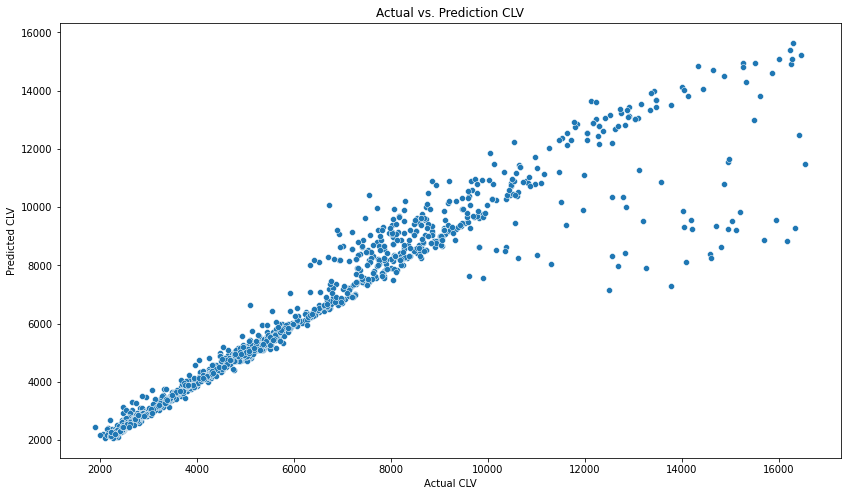

In [40]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV')

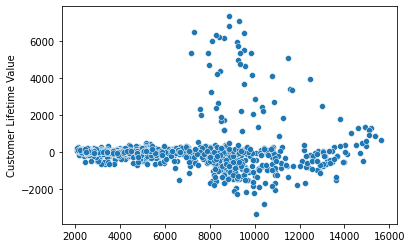

In [41]:
#residual
residuals = y_test - y_pred_xgb_tuning

sns.scatterplot(y_pred_xgb_tuning, residuals)
plt.show()

Jika kita lihat dari plot actual vs prediction dan plot residual diatas performa model untuk memprediksi mulai menurun ketika CLV di angka 8000 ke atas 

### **4.7. Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (Customer Lifetime Value), kita dapat mengeceknya melalui function feature_importances_.

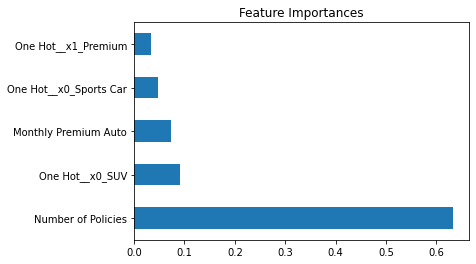

In [44]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat fitur yang paling mempengaruhi CLV adalah 'Number of Policies', 'Monthly Premium Auto', dan 'Vehicle Class'

## **5. Conclusion**
---

Model terbaik yang dipilih untuk memprediksi CLV adalah XGBoost. Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, MAPE, dan R-squared. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sekitar 4%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memprediksi Customer Lifetime Value pada rentang nilai seperti yang dilatih terhadap model, maka hasil prediksi CLVnya rata-rata dapat meleset kurang lebih sekitar 4% dari CLV yang seharusnya.

Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi. Bila dilihat dari visualisasi antara CLV aktual dan prediksi serta residual performa prediksi model mulai menurun ketika CLV sekitar 8.000 keatas. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek customer dan juga polis asuransi mereka.

Beberapa limitasi model yang tercipta karena adanya rentang nilai yang dipakai untuk train model ini yaitu:
- Nilai Customer Lifetime Value maksimal 16646.5203465
- Nilai Total Claim Amount maksimal 974.566507
- Nilai Monthly Premium Auto maksimal 163

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Number of Policies', 'Monthly Premium Auto', dan 'Vehicle Class' menjadi fitur yang paling berpengaruh terhadap target 'Customer Lifetime Value'.
Hal tersebut dapat menjawab bussiness problem mengenai apa saja aspek yang mempengaruhi CLV customer.
Dengan mengetahui fitur apa saja yang mempengaruhi CLV customer maka perusahaan dapat memfokuskan strategi bisnisnya terhadap ketiga aspek tersebut untuk dapat meningkatkan profit perusahaan. 

Berdasarkan pemodelan yang sudah dilakukan, perusahaan memiliki tool untuk memprediksi nilai Customer Lifetime Value.
Dengan dapat diprediksinya CLV maka dapat membantu bussiness problem mengenai perhitungan biaya maksimal untuk akuisisi customer. Perusahaan dapat mengatur agar biaya akuisisi tidak sampai melebihi CLV atau sebisa mungkin jauh lebih rendah dibanding CLV agar perusahaan mendapat profit maksimal.

## **6. Recommendation**
---

Beberapa hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi yaitu:

- Eksperimen menggunakan model machine learning lainnya yang belum digunakan pada project ini
- Eksperimen dalam hyperparameter tuning lebih lanjut
- Penambahan fitur lain yang behubungan dengan informasi polis customer, seperti informasi berapa bulan lamanya customer sudah menggunakan asuransi dari perusahaan ini.
- Mengecek prediksi data mana saja yang menghasilkan nilai error tinggi. lalu melakukan analisa hubungan antara error tersebut dengan setiap variable independen dengan tujuan untuk mengetahui sebenarnya variable mana saja yang menyebabkan prediksi model menghasilkan error yang tinggi.

---




## **Save Model**

In [45]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_CLV_XGB.sav', 'wb'))

In [46]:
# Load model
filename = 'Model_CLV_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))
np.sqrt(r2_score(y_test, loaded_model.predict(X_test)))

0.9520067616997477